In [68]:
# Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",25)
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split,RandomizedSearchCV,GridSearchCV
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from scipy.stats import boxcox
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,precision_score,recall_score

# Red Wine Data

In [69]:
# Red Wine Data

rdf = pd.read_csv("winequality-red.csv",sep=';')
print("Shape :",rdf.shape)
rdf.head()

Shape : (1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Variable Identification

In [71]:
# Categorical Columns

def cat_cols(dataframe):
    return list(dataframe.select_dtypes(include='object').columns)

categorical_columns = cat_cols(rdf)

In [72]:
# Numerical columns

def num_cols(dataframe):
    return list(dataframe.select_dtypes(include='number').columns)

numerical_columns = num_cols(rdf)

In [73]:
# Numerical and Categorical Columns

print("Categorical Columns :\n",categorical_columns)
print("\nNumerical Columns :\n",numerical_columns)

Categorical Columns :
 []

Numerical Columns :
 ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']


In [74]:
# Data info

rdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [75]:
# Data Description

rdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# Missing Values

In [70]:
# Missing Values

def missing_values(dataframe):
    counts = dataframe.isnull().sum()
    percent = dataframe.isnull().sum()/dataframe.shape[0]*100
    return pd.DataFrame({"Count":counts,"Percntage":percent},index=dataframe.isnull().sum().index)

missing_values(rdf)

,Count,Percntage
fixed acidity,0,0.0
volatile acidity,0,0.0
citric acid,0,0.0
residual sugar,0,0.0
chlorides,0,0.0
free sulfur dioxide,0,0.0
total sulfur dioxide,0,0.0
density,0,0.0
pH,0,0.0
sulphates,0,0.0


# Univariate  Analysis

In [76]:
# Column list

rdf.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [77]:
# Checking skewness of columns

for i in rdf.columns:
    print("\nSkewness of {0} : {1}\n".format(i,rdf[i].skew()))
    


Skewness of fixed acidity : 0.9827514413284587


Skewness of volatile acidity : 0.6715925723840199


Skewness of citric acid : 0.3183372952546368


Skewness of residual sugar : 4.54065542590319


Skewness of chlorides : 5.680346571971722


Skewness of free sulfur dioxide : 1.250567293314441


Skewness of total sulfur dioxide : 1.515531257594554


Skewness of density : 0.07128766294945525


Skewness of pH : 0.19368349811284427


Skewness of sulphates : 2.4286723536602945


Skewness of alcohol : 0.8608288068888538


Skewness of quality : 0.21780157547366327



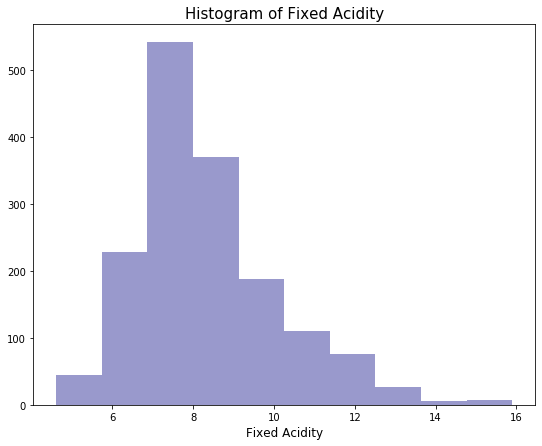

In [78]:
# Fixed Acidity 

plt.figure(figsize=[9,7])
sns.distplot(rdf['fixed acidity'],kde=False,bins=10,color='navy')
plt.xlabel("Fixed Acidity",fontsize=12)
plt.title("Histogram of Fixed Acidity",fontsize=15);

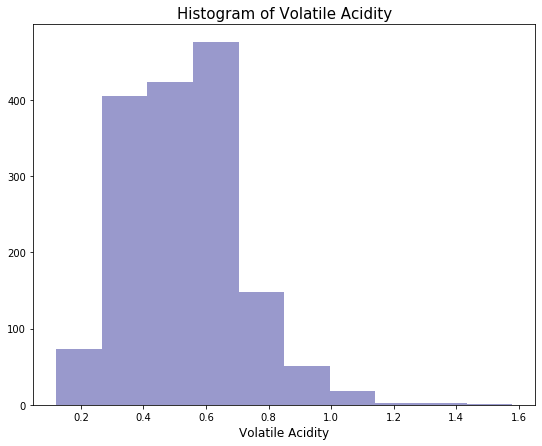

In [79]:
# Volatile Acidity 

plt.figure(figsize=[9,7])
sns.distplot(rdf['volatile acidity'],kde=False,bins=10,color='navy')
plt.xlabel("Volatile Acidity",fontsize=12)
plt.title("Histogram of Volatile Acidity",fontsize=15);

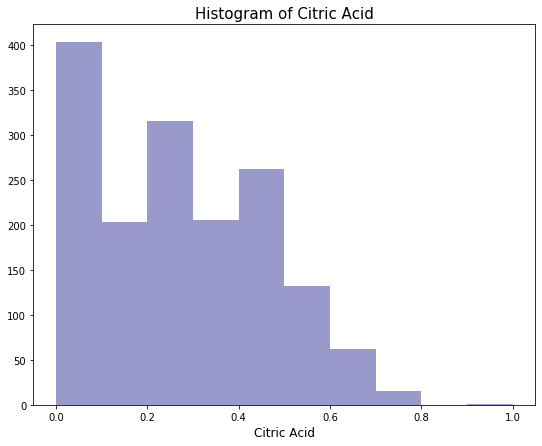

In [80]:
# Citric Acid

plt.figure(figsize=[9,7])
sns.distplot(rdf['citric acid'],kde=False,bins=10,color='navy')
plt.xlabel("Citric Acid",fontsize=12)
plt.title("Histogram of Citric Acid",fontsize=15);

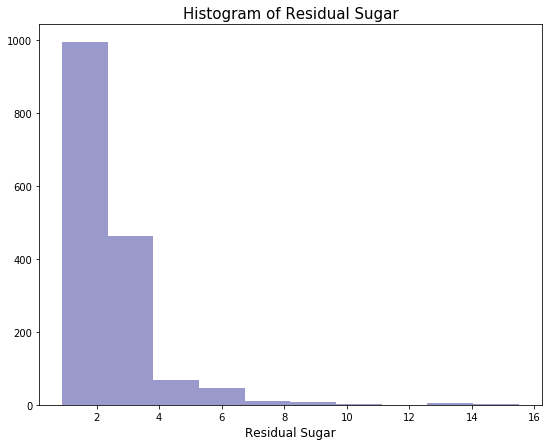

In [81]:
# Residual Sugar

plt.figure(figsize=[9,7])
sns.distplot(rdf['residual sugar'],kde=False,bins=10,color='navy')
plt.xlabel("Residual Sugar",fontsize=12)
plt.title("Histogram of Residual Sugar",fontsize=15);

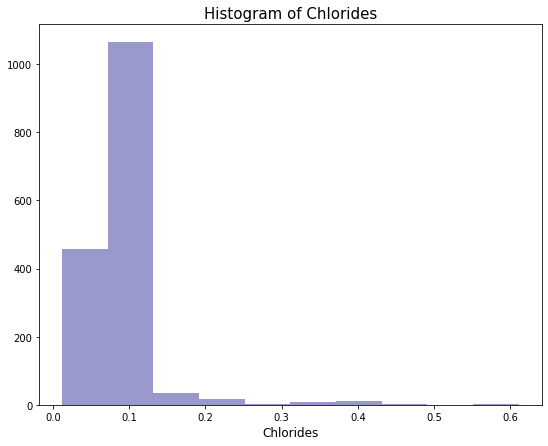

In [82]:
# Chlorides 

plt.figure(figsize=[9,7])
sns.distplot(rdf['chlorides'],kde=False,bins=10,color='navy')
plt.xlabel("Chlorides",fontsize=12)
plt.title("Histogram of Chlorides",fontsize=15);

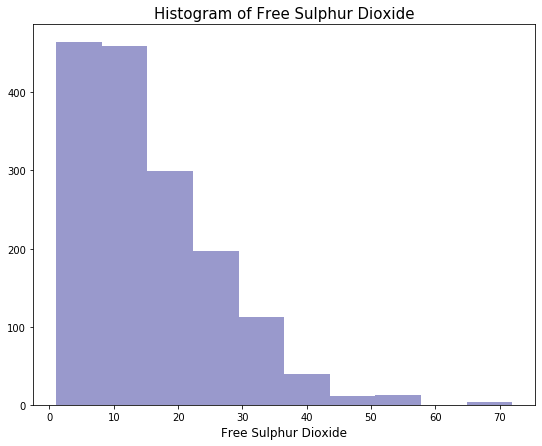

In [83]:
# Free Sulphur Dioxide

plt.figure(figsize=[9,7])
sns.distplot(rdf['free sulfur dioxide'],kde=False,bins=10,color='navy')
plt.xlabel("Free Sulphur Dioxide",fontsize=12)
plt.title("Histogram of Free Sulphur Dioxide",fontsize=15);

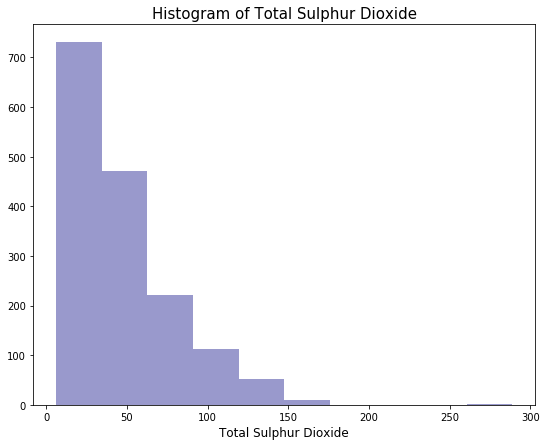

In [84]:
# Total Sulphur Dioxide

plt.figure(figsize=[9,7])
sns.distplot(rdf['total sulfur dioxide'],kde=False,bins=10,color='navy')
plt.xlabel("Total Sulphur Dioxide",fontsize=12)
plt.title("Histogram of Total Sulphur Dioxide",fontsize=15);

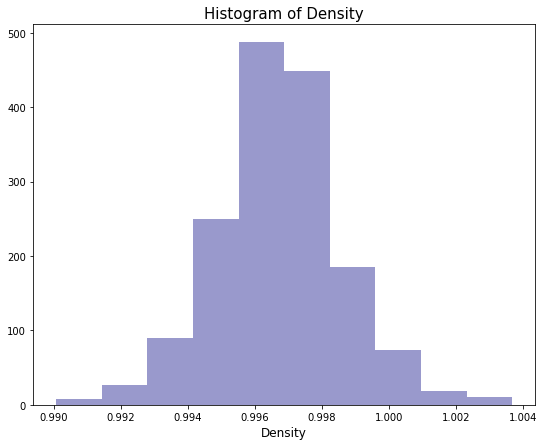

In [120]:
# Density

plt.figure(figsize=[9,7])
sns.distplot(rdf['density'],kde=False,bins=10,color='navy')
plt.xlabel("Density",fontsize=12)
plt.title("Histogram of Density",fontsize=15);

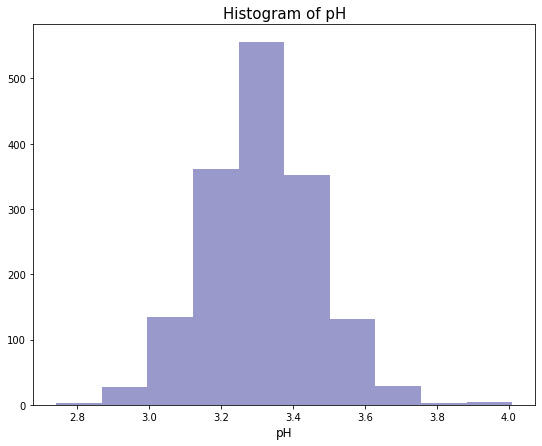

In [121]:
# pH

plt.figure(figsize=[9,7])
sns.distplot(rdf['pH'],kde=False,bins=10,color='navy')
plt.xlabel("pH",fontsize=12)
plt.title("Histogram of pH",fontsize=15);

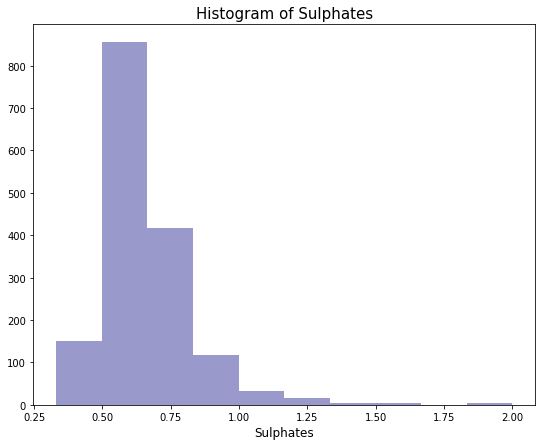

In [122]:
# Sulphates

plt.figure(figsize=[9,7])
sns.distplot(rdf['sulphates'],kde=False,bins=10,color='navy')
plt.xlabel("Sulphates",fontsize=12)
plt.title("Histogram of Sulphates",fontsize=15);

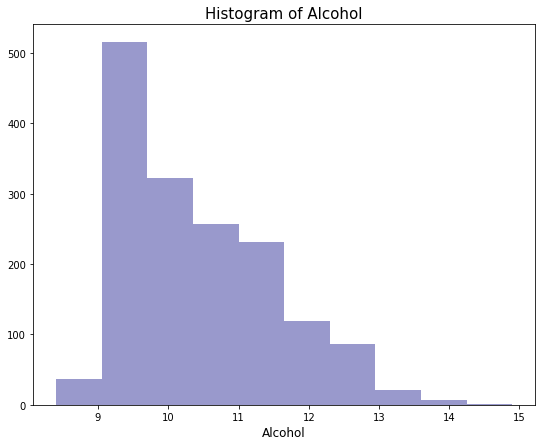

In [123]:
# Alcohol

plt.figure(figsize=[9,7])
sns.distplot(rdf['alcohol'],kde=False,bins=10,color='navy')
plt.xlabel("Alcohol",fontsize=12)
plt.title("Histogram of Alcohol",fontsize=15);

# Bivariate Analysis

In [89]:
# Correlation 

rdf.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [90]:
# Correlation w.r.t. target

rdf.corr()['quality']

fixed acidity           0.124052
volatile acidity       -0.390558
citric acid             0.226373
residual sugar          0.013732
chlorides              -0.128907
free sulfur dioxide    -0.050656
total sulfur dioxide   -0.185100
density                -0.174919
pH                     -0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

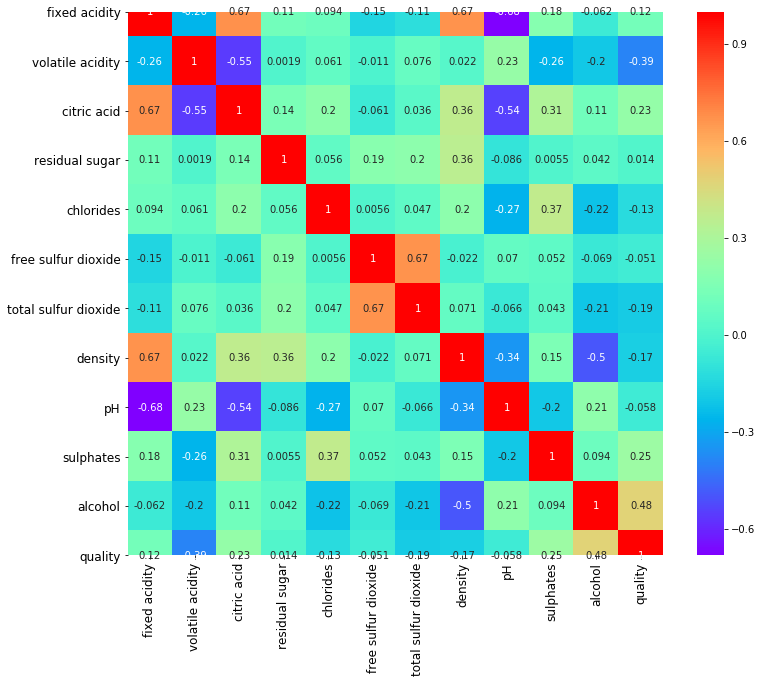

In [91]:
# Correlation Heatmap

plt.figure(figsize=[12,10])
sns.heatmap(rdf.corr(),annot=True,cmap='rainbow')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

# Outlier Detection

In [92]:
# Function to detect outliers in every feature

def detect_outliers(dataframe):
    cols = list(dataframe)
    outliers = pd.DataFrame(columns=['Feature','Number of Outliers'])
    
    for column in cols:
        if column in dataframe.select_dtypes(include=np.number).columns:
            # first quartile (Q1)
            q1 = dataframe[column].quantile(0.25) 
            
            # third quartile (Q3)
            q3 = dataframe[column].quantile(0.75)
            
            # IQR
            iqr = q3 - q1
            
            fence_low = q1 - (1.5*iqr)
            fence_high = q3 + (1.5*iqr)
            outliers = outliers.append({'Feature':column,'Number of Outliers':dataframe.loc[(dataframe[column] < fence_low) | (dataframe[column] > fence_high)].shape[0]},ignore_index=True)
    return outliers

detect_outliers(rdf)


,Feature,Number of Outliers
0,fixed acidity,49
1,volatile acidity,19
2,citric acid,1
3,residual sugar,155
4,chlorides,112
5,free sulfur dioxide,30
6,total sulfur dioxide,55
7,density,45
8,pH,35
9,sulphates,59


In [93]:
# # Function to treat outliers 

# def treat_outliers(dataframe):
#     cols = list(dataframe)
#     for col in cols:
#         if col in dataframe.select_dtypes(include=np.number).columns:
#             dataframe[col] = winsorize(dataframe[col], limits=[0.05, 0.1],inclusive=(True, True))
 
#     return dataframe    


# rwine_df = treat_outliers(rwine_df)


# # Checking for outliers after applying winsorization

# detect_outliers(rwine_df)



# Variable Transformation

In [94]:
# Square Root Transformstion of columns with high skewness

rdf['residual sugar'] = np.sqrt(rdf['residual sugar'])
rdf['chlorides'] = np.sqrt(rdf['chlorides'])

In [95]:
# Mapping different qualities of wine to 3 classes i.e Low(0), Medium(1) and High(2) 

bins = [0, 5.5, 7.5, 10]
labels = [0, 1, 2]
rdf['quality'] = pd.cut(rdf['quality'], bins=bins, labels=labels)

# Preprocessing and Model building

In [106]:
# Splitting the data into features and target

X = rdf.drop("quality",axis=1)
y = rdf.quality

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0,stratify=y)

# Feature Selection

In [109]:
# Feature Ranking

extra = ExtraTreeClassifier()
extra.fit(X,y)
ranked_features = pd.Series(extra.feature_importances_,index=X.columns).sort_values(ascending=False)
ranked_features

alcohol                 0.174838
total sulfur dioxide    0.128413
sulphates               0.096448
volatile acidity        0.096274
citric acid             0.083560
chlorides               0.078690
free sulfur dioxide     0.075671
density                 0.068443
pH                      0.068065
residual sugar          0.065570
fixed acidity           0.064027
dtype: float64

In [110]:
# Scaling the data

minmax = MinMaxScaler()
X_train_scaled = minmax.fit_transform(X_train)
X_test_scaled = minmax.transform(X_test)

In [111]:
# Logistic Regression

clf = LogisticRegression()
clf.fit(X_train_scaled,y_train)
clf.score(X_test_scaled,y_test)

0.784375

In [112]:
# Decision Tree Classifier

dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.74375

In [113]:
# Naive Bayes Multinomial

mnclf = MultinomialNB()
mnclf.fit(X_train_scaled,y_train)
mnclf.score(X_test_scaled,y_test)

0.678125

In [114]:
# Random Forest

rf = RandomForestClassifier()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

0.846875

In [115]:
# Hyperparamter Tuning

n_estimators = [int(x) for x in np.linspace(start=50, stop=1000, num=10)]
# number of features to consider at every split
max_features = ['auto', 'sqrt']
# max number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num=10)] + [None]
# min number of samples required to split a node
min_samples_split = [2, 5, 10]
# min number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# method of selecting samples for training each tree
bootstrap = [True, False]

In [116]:
# random grid

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

rf_optimized = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=0)

rf_optimized.fit(X_train,y_train)
rf_optimized.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   1.2s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   1.2s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=87, bootstrap=True, total=   1.2s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   0.7s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True, total=   0.7s
[CV] n_estimators=366, min_samples_split=10, min_samples_leaf=4, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=366, mi

[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=87, bootstrap=True, total=   2.2s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   1.3s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   1.3s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=True, total=   1.4s
[CV] n_estimators=50, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=10, bootstrap=False 
[CV]  n_estimators=50, min_sample

[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=   2.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=   2.5s
[CV] n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=87, bootstrap=False, total=   2.6s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True, total=   1.8s
[CV] n_estimators=788, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=110, bootstrap=True 
[CV]  n_estimators=788,

[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True, total=   1.1s
[CV] n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True 
[CV]  n_estimators=577, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=43, bootstrap=True, total=   1.2s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.8s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.8s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=1, max_features=sqrt, max_depth=None, bootstrap=True 
[CV]  n_estimators=89

[CV]  n_estimators=894, min_samples_split=10, min_samples_leaf=2, max_features=sqrt, max_depth=None, bootstrap=True, total=   1.9s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.4s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.4s
[CV] n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False 
[CV]  n_estimators=155, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=87, bootstrap=False, total=   0.4s
[CV] n_estimators=894, min_samples_split=10, min_samples_leaf=4, max_features=auto, max_depth=10, bootstrap=True 
[CV]  n_estimators=894, mi

[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.1s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=auto, max_depth=65, bootstrap=True, total=   0.1s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True, total=   0.8s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True 
[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True, total=   0.8s
[CV] n_estimators=366, min_samples_split=5, min_samples_leaf=1, max_features=sqrt, max_depth=32, bootstrap=True 
[CV]  n_estimators=366, min_samples_spl

[CV]  n_estimators=366, min_samples_split=5, min_samples_leaf=2, max_features=auto, max_depth=76, bootstrap=False, total=   1.0s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False, total=   2.7s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False, total=   2.6s
[CV] n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False 
[CV]  n_estimators=1000, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=32, bootstrap=False, total=   2.5s
[CV] n_estimators=261, min_samples_split=5, min_samples_leaf=2, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimator

[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   0.9s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   0.9s
[CV] n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True 
[CV]  n_estimators=472, min_samples_split=10, min_samples_leaf=2, max_features=auto, max_depth=None, bootstrap=True, total=   0.9s
[CV] n_estimators=577, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=False 
[CV]  n_estimators=577, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=False, total=   1.4s
[CV] n_estimators=577, min_samples_split=10, min_samples_leaf=1, max_features=auto, max_depth=54, bootstrap=False 
[CV]  n_estimat

[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=   2.0s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=2, max_features=auto, max_depth=98, bootstrap=True, total=   1.9s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True, total=   1.9s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True, total=   1.9s
[CV] n_estimators=894, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=65, bootstrap=True 
[CV]  n_estimators=894, min_samples_

[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:  5.9min finished


{'n_estimators': 577,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 32,
 'bootstrap': True}

In [119]:
# Random Forest Classifier

rf = RandomForestClassifier(n_estimators=577, min_samples_split=5, min_samples_leaf=1,
                             max_features='sqrt', max_depth = 32, bootstrap = True,random_state=0)

rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
print("Accuracy : ",accuracy_score(y_test,y_pred))
print("\nClassification Report : ",classification_report(y_test,y_pred))

Accuracy :  0.84375

Classification Report :                precision    recall  f1-score   support

           0       0.87      0.82      0.84       149
           1       0.83      0.89      0.86       167
           2       0.00      0.00      0.00         4

    accuracy                           0.84       320
   macro avg       0.56      0.57      0.57       320
weighted avg       0.83      0.84      0.84       320

